# Homework 2 - IEEE Fraud Detection

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
import numpy as np
import pandas as pd
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
import getpass
import os

In [0]:
 #Read train Transaction and Identity Data
x_train_transc = pd.read_csv("/content/drive/My Drive/ieee-fraud-detection/train_transaction.csv")
x_train_identity = pd.read_csv("/content/drive/My Drive/ieee-fraud-detection/train_identity.csv")

In [0]:
#selecting non-anonymous fields from transactionData
trainTrans = x_train_transc[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4',
                                      'card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','isFraud']]
#selecting non-anonymous fields from trainData
trainIdentity = x_train_identity[['TransactionID','DeviceType','DeviceInfo']]

In [0]:
#merging transaction and identity data
trainData = pd.merge(left=trainTrans,right=trainIdentity, left_on='TransactionID', right_on='TransactionID',how = 'left')

In [0]:
trainData.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,0,NaN,NaN
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,0,NaN,NaN
2,2987002,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,0,NaN,NaN
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,0,NaN,NaN
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,0,mobile,SAMSUNG SM-G892A Build/NRD90M


In [0]:
#Function for plotting distribution and calculating statistics on input data
def fraudDistribution(inputData, columnName, isFraud,figx,figy,orderVal) :
    plt.figure(figsize=(figx,figy))
    ctab = pd.crosstab(inputData[columnName], inputData['isFraud'], normalize='index') * 100
    ctab = ctab.reset_index()
    ctab.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    if len(orderVal) == 0:
        orderVal = list(ctab[columnName].values)
    plot = sns.countplot(x=columnName, hue=isFraud, data=inputData, order=orderVal)
    plt.legend( loc='best', labels=['Non-Fraud', 'Fraud'])
    plot2 = plot.twinx()
    plot2 = sns.pointplot(x=columnName,y='Fraud',data=ctab,color='Black',order=orderVal)
    plot2.set_ylabel("% of Fraud Transactions", fontsize=16)
    plot.set_title(columnName+" and Fraud Distribution", fontsize=18)
    plot.set_xlabel(columnName+" Name", fontsize=16)
    plot.set_ylabel("Count", fontsize=16)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=40,ha = 'right')
    plt.show()

#Caluclation of mean and count
def stats(df,columnName,isFraud):
    df = df.groupby([columnName])[isFraud].agg(['count','mean'])
    df.reset_index(inplace=True)
    df = df.sort_values(by = 'mean', ascending=False)
    print(df)

## Distribution of Fraudlent and Non-Fraudlent Transaction 

### Fraud and Non-Fraud Count

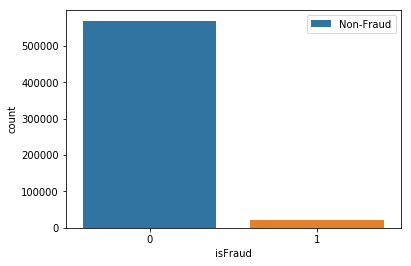

In [0]:
 plot = sns.countplot(x="isFraud", data=trainData)
 plt.legend( loc='best', labels=['Non-Fraud','Fraud'])
 plt.show()

Number of fraudelent transactions are very less as compared to fraudelent transactions

### Device Type vs. Fraud

  DeviceType  count      mean
1     mobile  55645  0.101662
0    desktop  85165  0.065215


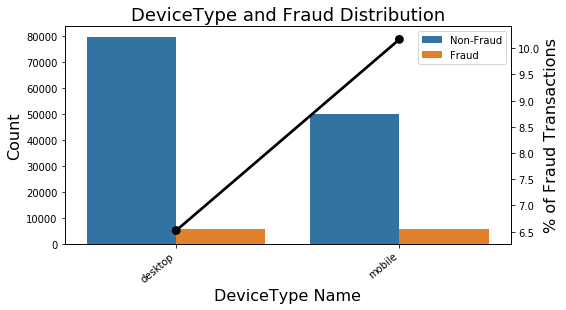

Percentage of Fraudelent transactions are more from Mobile as compared to Desktop


In [0]:
stats(trainData,"DeviceType","isFraud")
fraudDistribution(trainData,"DeviceType","isFraud",8,4,[])
print("Percentage of Fraudelent transactions are more from Mobile as compared to Desktop")

### Device Type vs. Fraud

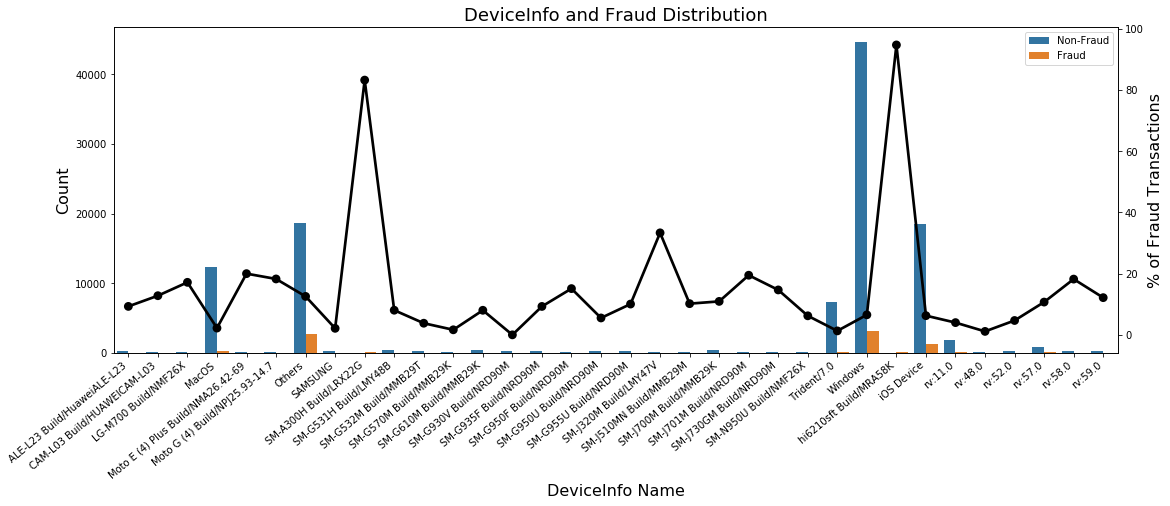

0    569877
1     20663
Name: isFraud, dtype: int64

In [0]:
trainData.loc[trainData.DeviceInfo.isin(trainData.DeviceInfo.value_counts()[trainData.DeviceInfo.value_counts()<= 150].index), 'DeviceInfo'] = "Others"
fraudDistribution(trainData,"DeviceInfo","isFraud",18,6,[])
trainData['isFraud'].value_counts()

### TransactionDT  vs. Fraud

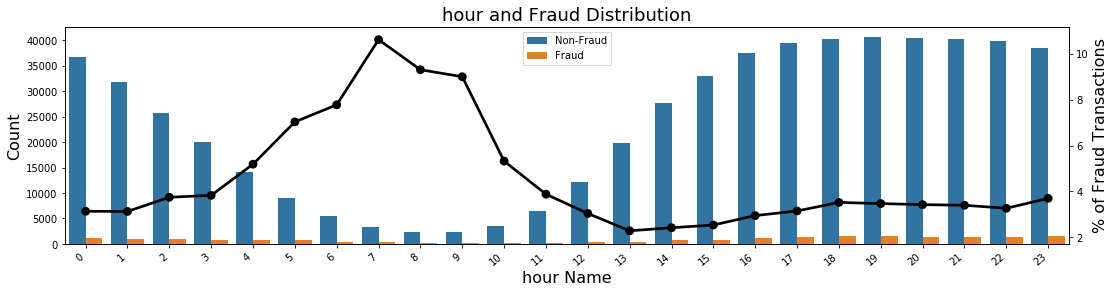

We can infer from this plot, that fraudelent transacation % increases aound 3rd hour till 9th hour


In [0]:
trainData['hour'] = ((trainData['TransactionDT']%(24*60*60))/3600).astype(int)
fraudDistribution(trainData,"hour","isFraud",18,4,[])
print("We can infer from this plot, that fraudelent transacation % increases aound 3rd hour till 9th hour")

### Product Code vs. Fraud

  ProductCD   count      mean
0         C   68519  0.116873
3         S   11628  0.058996
1         H   33024  0.047662
2         R   37699  0.037826
4         W  439670  0.020399


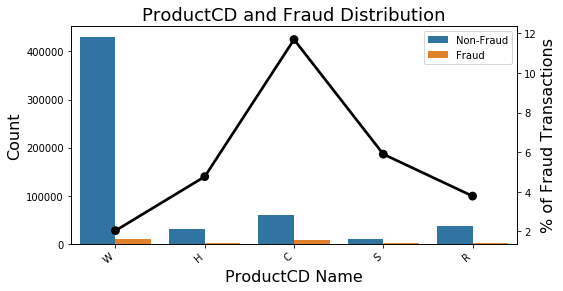

Product W has maximum no. of Transactions, but maximum Fraud % is for C product


In [0]:
stats(trainData,"ProductCD","isFraud")
fraudDistribution(trainData,"ProductCD","isFraud",8,4,['W','H','C','S','R'])
print("Product W has maximum no. of Transactions, but maximum Fraud % is for C product")

### Card4 vs. Fraud

              card4   count      mean
1          discover    6651  0.077282
3              visa  384767  0.034756
2        mastercard  189217  0.034331
0  american express    8328  0.028698


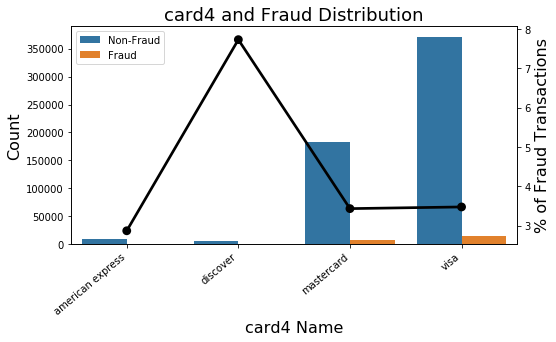

Percentage of Fraudelent transactions are more from Discover card as compared to other cards


In [0]:
stats(trainData,"card4","isFraud")
fraudDistribution(trainData,"card4","isFraud",8,4,[])
print("Percentage of Fraudelent transactions are more from Discover card as compared to other cards")

###  Card6 vs. Fraud

             card6   count      mean
1           credit  148986  0.066785
2            debit  439938  0.024263
0      charge card      15  0.000000
3  debit or credit      30  0.000000


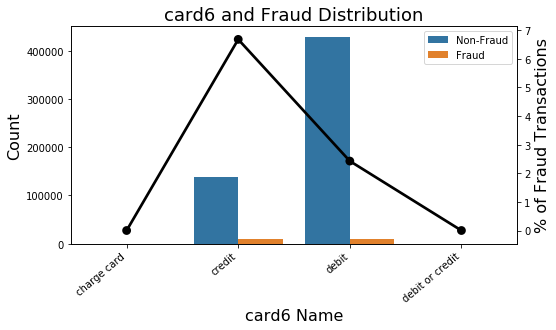

Fraudelent transactions are maximum from credit card


In [0]:
stats(trainData,"card6","isFraud")
fraudDistribution(trainData,"card6","isFraud",8,4,[])
print("Fraudelent transactions are maximum from credit card")

###  P_EmailDomain vs. Fraud

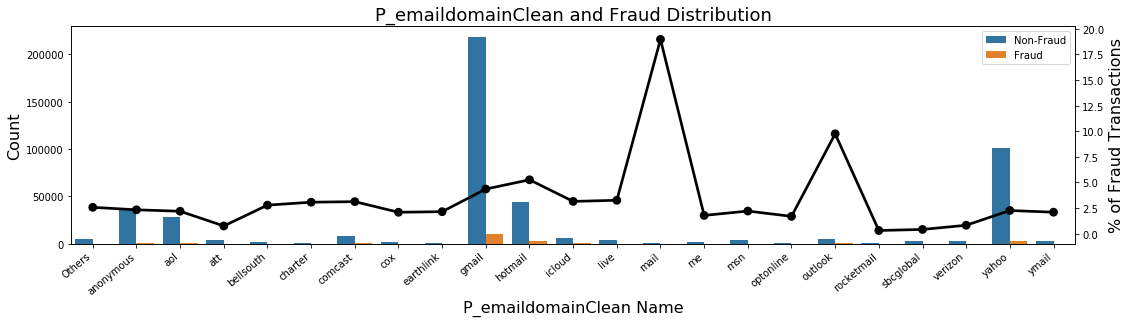

In [0]:
#Cleaning the values in this column by taking only domain name (e.g. gmail.com, yahoo.com..)
trainData['P_emaildomainClean'] = trainData['P_emaildomain'].str.split('.',expand=True)[0]
trainData.loc[trainData.P_emaildomainClean.isin(trainData.P_emaildomainClean.value_counts()[trainData.P_emaildomainClean.value_counts()<= 500].index), 'P_emaildomainClean'] = "Others"
#Plotting the Data
fraudDistribution(trainData,"P_emaildomainClean","isFraud",18,4,[])

###  R_EmailDomain vs. Fraud

             card6   count      mean
1           credit  148986  0.066785
2            debit  439938  0.024263
0      charge card      15  0.000000
3  debit or credit      30  0.000000


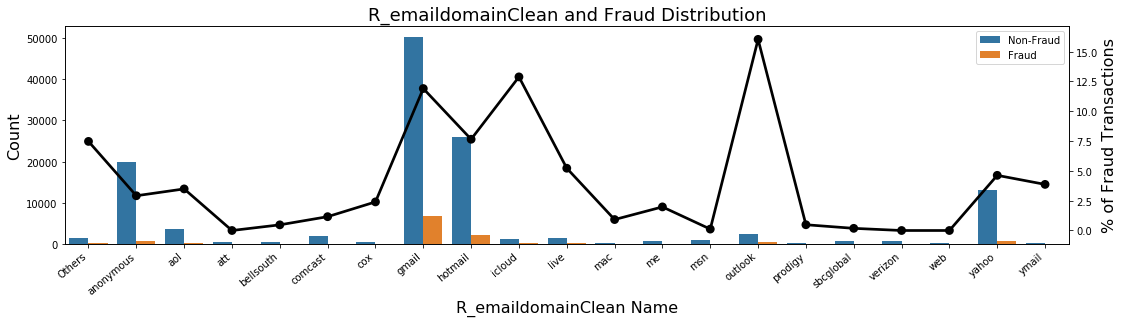

Percentage of Fraudelent transactions are more for outlook Receipient mail domain as compared to other mail domains


In [0]:
trainData['R_emaildomainClean'] = trainData['R_emaildomain'].str.split('.',expand=True)[0]
trainData.loc[trainData.R_emaildomainClean.isin(trainData.R_emaildomainClean.value_counts()[trainData.R_emaildomainClean.value_counts()<= 200].index), 'R_emaildomainClean'] = "Others"
stats(trainData,"card6","isFraud")
fraudDistribution(trainData,"R_emaildomainClean","isFraud",18,4,[])
print("Percentage of Fraudelent transactions are more for outlook Receipient mail domain as compared to other mail domains")

### Addr1 vs. Fraud

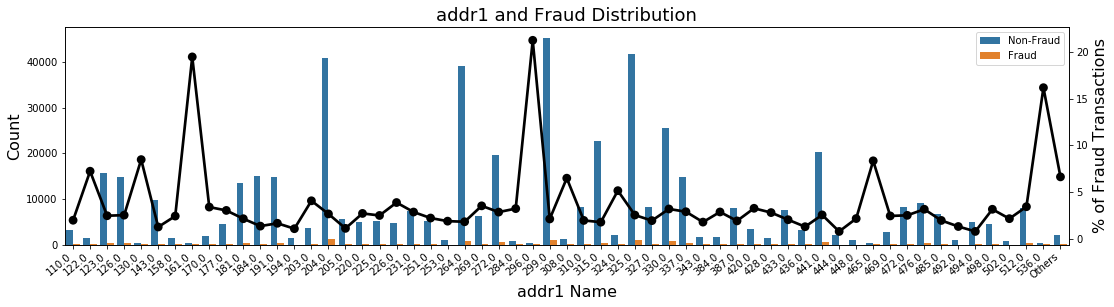

In [0]:
trainData.loc[trainData.addr1.isin(trainData.addr1.value_counts()[trainData.addr1.value_counts()<= 200].index), 'addr1'] = "Others"
fraudDistribution(trainData,"addr1","isFraud",18,4,[])
# stats(trainData,"addr1","isFraud")


### Addr2 vs. Fraud

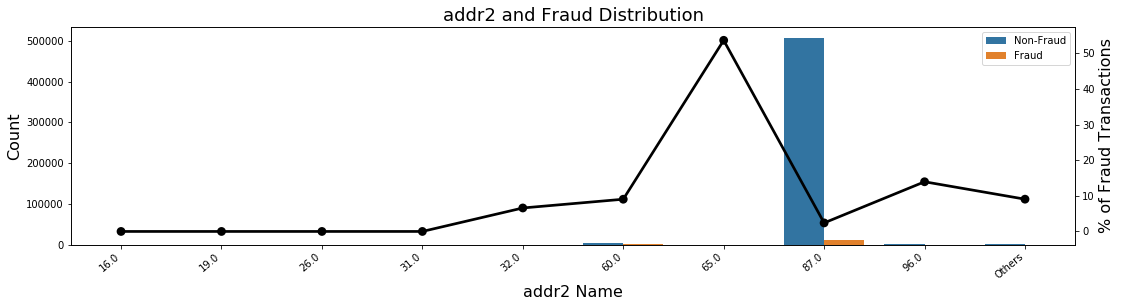

Maximum number of transactions are fron country code 87


In [0]:
# stats(trainData,"addr2","isFraud")
trainData.loc[trainData.addr2.isin(trainData.addr2.value_counts()[trainData.addr2.value_counts()<= 20].index), 'addr2'] = "Others"
# trainData['addr2'] = trainTrans['addr2']
fraudDistribution(trainData,"addr2","isFraud",18,4,[])
print("Maximum number of transactions are fron country code 87")

## Part 2 - Transaction Frequency

In [0]:
trainData.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,DeviceType,DeviceInfo,hour,P_emaildomainClean,R_emaildomainClean
0,2987000,86400,68.5,W,discover,credit,NaN,NaN,315,87,19.0,NaN,0,NaN,NaN,0,NaN,NaN
1,2987001,86401,29.0,W,mastercard,credit,gmail.com,NaN,325,87,NaN,NaN,0,NaN,NaN,0,gmail,NaN
2,2987002,86469,59.0,W,visa,debit,outlook.com,NaN,330,87,287.0,NaN,0,NaN,NaN,0,outlook,NaN
3,2987003,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476,87,NaN,NaN,0,NaN,NaN,0,yahoo,NaN
4,2987004,86506,50.0,H,mastercard,credit,gmail.com,NaN,420,87,NaN,NaN,0,mobile,Others,0,gmail,NaN


In [0]:
#Function for frequency distribution by time for a country 
def hourDistriByFraud(data,normalize,orderVal):
    x, y, hue = "hour", "proportion", "isFraud"
    hue_order = ["Fraud", "Non-Fraud"]
    plt.figure(figsize=(18,4))
    plot = (data[x]
     .groupby(data[hue])
     .value_counts(normalize=normalize)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plot2 = plot.twinx()
    ctab = pd.crosstab(data["hour"], data['isFraud'], normalize='index') * 100
    ctab = ctab.reset_index()
    ctab.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    if len(orderVal) == 0:
        orderVal = list(ctab["hour"].values)
    plot2 = sns.pointplot(x="hour",y='Fraud',data=ctab,color='Black',order=orderVal)
    plot2.set_ylabel("% of Fraud Transactions", fontsize=16)
    plt.show()

In [0]:
#Finding the most frequent country code
trainData['addr2'].value_counts()

87.0      520481
60.0        3084
96.0         638
Others       298
32.0          91
65.0          82
16.0          55
31.0          47
19.0          33
26.0          25
Name: addr2, dtype: int64

##### Country with country code 87 has the most number of transactions

##### Plot of frequency of transactions by time of the day to depict what waking hours are associated with the country. Also % of fraud distributions over the entire day is shownWrite your answer here

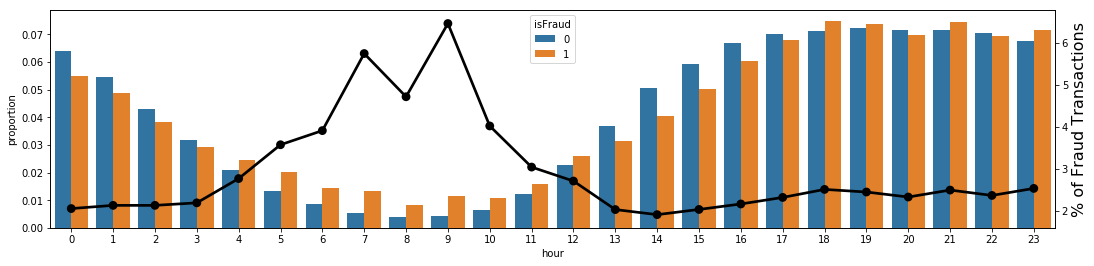

In [0]:
trainDataCC87 = trainData[trainData['addr2'] == 87.0]
hourDistriByFraud(trainDataCC87,True,[])

##### As the plot is U-shaped curve, and we can see the frequency of transactions decreases after 0th hour of the day(midnight) till 9-10th hour of the day. Hence, we can infer that waking hours of the most frequent country (87) is from 9-10th hour of the day till 23rd-0th hour of the day.

#### NOTE: We can see from the plot that % of fraudelent transactions is maximum during the sleeping hours (around 6th hour - 9th hour)

## Part 3 - Product Code

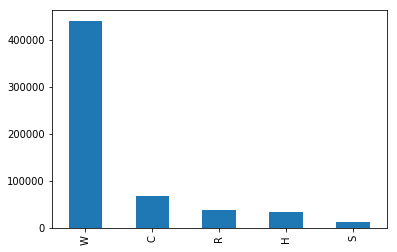

In [0]:
# Number of transactions of each product
trainData['ProductCD'].value_counts().plot(kind='bar');

In [0]:
# trainData.groupby(['ProductCD','isFraud'])['TransactionAmt'].describe()
trainData.groupby(['ProductCD'])['TransactionAmt'].describe()

,count,mean,std,min,25%,50%,75%,max
ProductCD,,,,,,,,
C,68519.0,42.872353,38.943070,0.251,18.423,31.191,54.102,712.896
H,33024.0,73.170058,61.950955,15.000,35.000,50.000,100.000,500.000
R,37699.0,168.306188,142.035568,25.000,100.000,125.000,200.000,1800.000
S,11628.0,60.269487,80.546775,5.000,20.000,35.000,80.000,1550.000
W,439670.0,153.158554,268.733692,1.000,49.000,78.500,146.000,31937.391


#### The mean for Product C is the smallest (42.8 USD) and also the 75% of transaction amount lies within 54.1 USD, other products have 75% transaction amount more that this. Hence, according to me Product C is the cheapest product.

#### The mean, 25%, 75%(Product R) is greatest.  Hence, according to me Product R is the most expensive product.

## Part 4 - Correlation Coefficient

From this heat map we can infer that correlation between Transaction Amount and time of day is 0.045


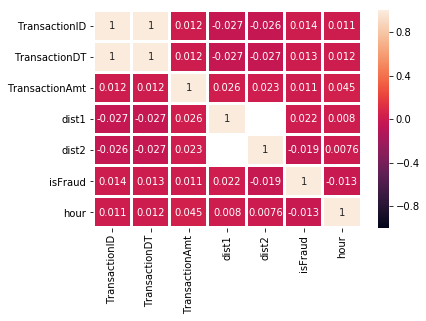

In [0]:
sns.heatmap(trainData.corr(), vmin=-1, vmax=1, linewidths=2, annot=True);
print("From this heat map we can infer that correlation between Transaction Amount and time of day is 0.045")

In [0]:
trainData['hour'].corr(trainData['TransactionAmt'])

0.04453235603065289

Frequency of Transaction per hour


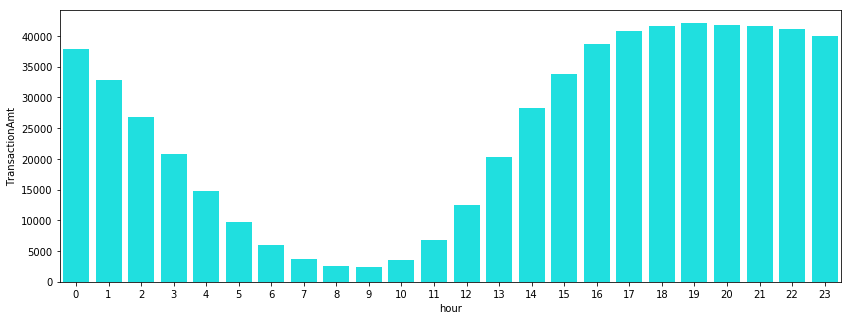

In [0]:
transAmntFreqPerHour = trainData.groupby('hour')['TransactionAmt'].size()
transAmntFreqPerHour = transAmntFreqPerHour.reset_index()
plt.figure(figsize=(14,5))
sns.barplot(transAmntFreqPerHour['hour'], transAmntFreqPerHour['TransactionAmt'],color = "cyan");
print("Frequency of Transaction per hour")

Sum of Transaction Amount per hour


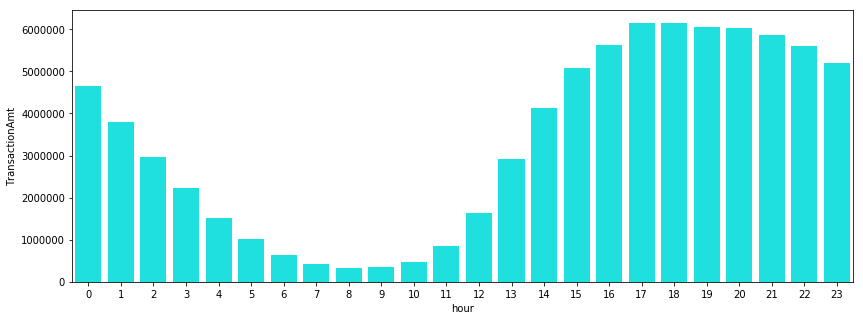

In [0]:
transAmntPerHour = trainData.groupby('hour')['TransactionAmt'].sum()
transAmntPerHour = transAmntPerHour.reset_index()
plt.figure(figsize=(14,5))
sns.barplot(transAmntPerHour['hour'], transAmntPerHour['TransactionAmt'],color = "cyan");
print("Sum of Transaction Amount per hour")

Mean of Transaction Amount per hour


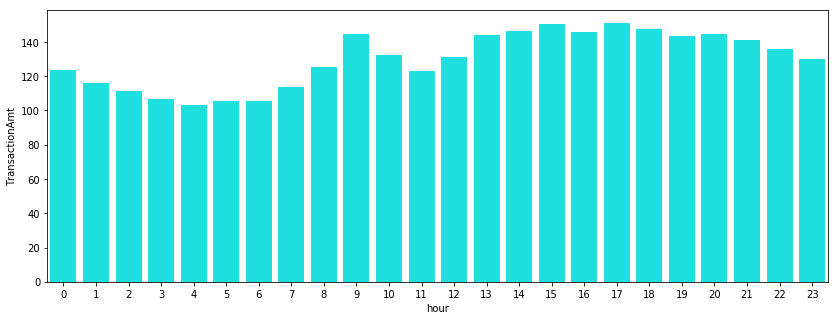

In [0]:
transAmntMeanPerHour = trainData.groupby('hour')['TransactionAmt'].mean()
transAmntMeanPerHour = transAmntMeanPerHour.reset_index()
plt.figure(figsize=(14,5))
sns.barplot(transAmntMeanPerHour['hour'], transAmntMeanPerHour['TransactionAmt'],color = "cyan");
print("Mean of Transaction Amount per hour")

## Part 5 - Interesting Plot

In [0]:
productCDdist1 = trainData.groupby('ProductCD')['dist1'].describe().reset_index()
productCDdist2 = trainData.groupby('ProductCD')['dist2'].describe().reset_index()

In [0]:
productCDdist1

,ProductCD,count,mean,std,min,25%,50%,75%,max
0,C,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,238269.0,118.50218,371.872026,0.0,3.0,8.0,24.0,10286.0


In [0]:
productCDdist2

,ProductCD,count,mean,std,min,25%,50%,75%,max
0,C,26741.0,224.828765,481.911824,0.0,7.0,60.0,226.0,10237.0
1,H,901.0,257.541620,646.198201,0.0,7.0,19.0,148.0,7380.0
2,R,5524.0,288.419080,727.350095,0.0,6.0,20.0,149.0,11623.0
3,S,4461.0,198.746021,473.320625,0.0,7.0,30.0,168.0,4475.0
4,W,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### From the above statistical values we can see that only for Product W all dist2 values are NaN (Product C, H, R ,S not NaN), while for Products C, H, R, S dist1 values are NaN (Product W not NaN). Hence, from this observation we can say that all of the transactions for Products C, H, R, S are made from one category only (Dist2 - zip code or address or ip or Phone) and for Product W the transactions are done from other category (Dist1) . I have shown this observation through a scatter plot below.

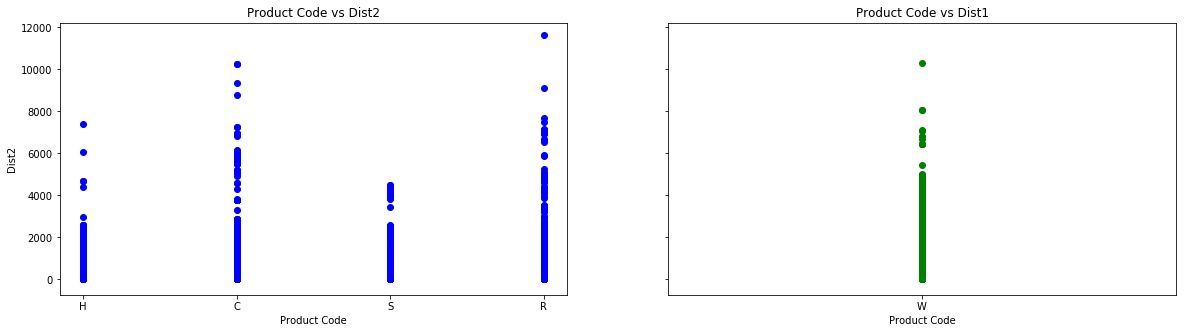

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,5))
ax1.scatter(trainData['ProductCD'],trainData['dist2'],c='b',marker='o')
ax2.scatter(trainData['ProductCD'],trainData['dist1'],c='g',marker='o')
ax1.set_xlabel("Product Code")
ax1.set_title("Product Code vs Dist2")
ax1.set_ylabel("Dist2")
ax2.set_xlabel("Product Code")
# ax2.set_ylabel("Dist2")
ax2.set_title("Product Code vs Dist1")
plt.show()

## Part 6 - Prediction Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

In [0]:
def makeSubmissionFile(y_pred,model,isProb):
  if(isProb):
    ans =pd.DataFrame({'TransactionID': x_test['TransactionID'], 'isFraud': y_pred[:]})
  else:
    ans =pd.DataFrame({'TransactionID': x_test['TransactionID'], 'isFraud': y_pred[:,1]})
  ans.to_csv('submission'+model+'.csv',index=False)

In [0]:
#Column list for Transaction and Identity Data

colListTransc = ['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2', 'M4', 'card1', 'card2', 'card3',  'card5','M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9','isFraud', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14','D15']
colListIdentity = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'TransactionID','DeviceType','DeviceInfo']

In [0]:
#Column List on which model will be trained
trainColList= ['P_emaildomain','id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29','id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14','D15','dist1','dist2','TransactionAmt','time']

In [0]:
xTrainTrans = x_train_transc[colListTransc]
xTrainTdentity = x_train_identity[colListIdentity]

In [0]:
#Reading test data
testTransc = pd.read_csv("/content/drive/My Drive/ieee-fraud-detection/test_transaction.csv")
testIdentity = pd.read_csv("/content/drive/My Drive/ieee-fraud-detection/test_identity.csv")

In [0]:
colListTransc.remove("isFraud")
x_test_trans = testTransc[colListTransc]
x_test_identity = testIdentity[colListIdentity]

In [0]:
#Adding time feature to our data
xTrainTrans['time'] = ((xTrainTrans['TransactionDT']%(24*60*60))/3600).astype(int)
x_test_trans['time'] = ((x_test_trans['TransactionDT']%(24*60*60))/3600).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
x_train = pd.merge(left=xTrainTrans,right=xTrainTdentity, left_on='TransactionID', right_on='TransactionID',how = 'left')
x_test = pd.merge(left=x_test_trans,right=x_test_identity, left_on='TransactionID', right_on='TransactionID',how = 'left')

### DATA CLEANING
### Using label encoding to convert categorical (non-numeric and numeric) columns to labels

In [0]:
#Filling NaN values with mode of the column
x_train = x_train.fillna(x_train.mode())
x_test = x_test.fillna(x_test.mode())

In [0]:
le = LabelEncoder()
for col in trainColList:
#     data=x_train[col].append(x_test[col])/
    val = np.array(list(x_train[col].values.astype(str)) + list(x_test[col].values.astype(str)))
    le.fit(val)
    x_train[col]=le.transform(x_train[col].astype(str))
    x_test[col]=le.transform(x_test[col].astype(str))

In [0]:
x_train['TransactionAmt'] = x_train_transc['TransactionAmt']
x_test['TransactionAmt'] = testTransc['TransactionAmt']
y_train = x_train_transc['isFraud']

### Test-Train Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.6, random_state=42)

In [0]:
X_train.drop(['isFraud'], axis=1,inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Prediction Models

### 1. XG Boost Classifier

In [0]:
model = xgb.XGBClassifier(n_estimators=300,max_depth=9,learning_rate=0.05,subsample=0.9,colsample_bytree=0.9, )
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [0]:
y_pred = model.predict_proba(x_test)
makeSubmissionFile(y_pred,'XGB')

#### Kaggle Score = 0.9165

### 2. Random Forest Regressor

In [0]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)
makeSubmissionFile(y_pred,'RF',True)

#### Kaggle Score = 0.8740

### 3. GradientBoost Classifier

In [0]:
clfGB = GradientBoostingClassifier(n_estimators=300,learning_rate=0.2)
clfGB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_pred = clfGB.predict_proba(x_test)
makeSubmissionFile(y_pred,'GBoost',False)

#### Kaggle Score = 0.8929

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/amanagarwal0307

Highest Rank: 4558

Score: 0.9165

Number of entries: 19

![](https://drive.google.com/open?id=1a3NfcNLsV7zKGmnpJA8Y4Pytvkun43EP)INCLUDE IMAGE OF YOUR KAGGLE RANKING

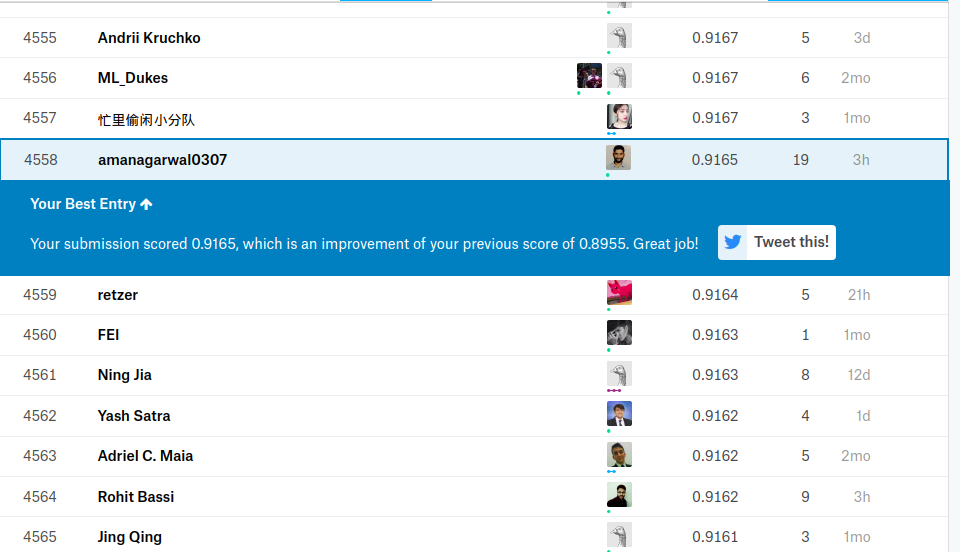

In [0]:
from IPython.display import Image
Image("/content/Kaggle-IEEE Fraud Detection Rank.png")

## References
https://pandas.pydata.org/

https://matplotlib.org/

https://seaborn.pydata.org/

https://stackoverflow.com/questions/44601533/how-to-use-onehotencoder-for-multiple-columns-and-automatically-drop-first-dummy

https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra

https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#latest-633734

https://datascience.stackexchange.com/questions/32981/how-to-deal-with-typeerror-ufunc-isnan-not-supported-for-the-input-types

https://towardsdatascience.com/precision-vs-recall-386cf9f89488

https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots

https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

https://stackoverflow.com/questions/46541543/how-to-plot-pandas-crosstab-columns/46543278

https://stackoverflow.com/questions/47360510/pandas-groupby-and-aggregation-output-should-include-all-the-original-columns-i

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://colab.research.google.com/notebooks/welcome.ipynb#recent=true

https://scikitlearn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

https://stackoverflow.com/questions/47255746/change-order-on-x-axis-for-matplotlib-chart

http://www.datasciencemadesimple.com/scatter-plot-in-python-using-matplotlib/

https://forum.openoffice.org/en/forum/viewtopic.php?f=9&t=61760

https://www.originlab.com/doc/Origin-Help/Plot-Data-by-Groups

https://github.com/mwaskom/seaborn/issues/1263

https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions

https://discuss.analyticsvidhya.com/t/use-of-pandas-crosstab-in-python-to-create-stacked-histogram/1134/2